# Bioinformatics Project

### Feature (Gene) Selection for Microarray Classification

#### Implementation

1. Import libraries.

In [1]:
import sys
import time
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

2. Get user inputs (name of dataset and objectives be considered).

In [2]:
dataset_name = sys.argv[1]
objectives   = sys.argv[2]
dataset_name = 'shipp'     # gordon: lung # shipp: lymphoma # singh: prostate # tian: myeloma

3. Read dataset.

In [3]:
samples = pd.read_csv('Datasets/' + dataset_name + '_inputs.csv', header = None)
labels = pd.read_csv('Datasets/' + dataset_name + '_outputs.csv', header = None)

4. Pre-process dataset.

In [4]:
samples.fillna(0, inplace = True)
samples = np.asarray(samples.values)
labels = np.transpose(np.asarray(labels.values.ravel() - 1, dtype=int))
samples = preprocessing.MinMaxScaler().fit_transform(samples)


5. Pre-select best 100 features with univariate chi square statistical analysis.

In [5]:
samples = SelectKBest(chi2, k = 100).fit_transform(samples, labels)

6. Be ready! Last preparations.

In [6]:
indexes           = [0, 1]
scores            = []
loo               = LeaveOneOut()
cv                = KFold(n_splits = 10, shuffle=False)
number_of_classes = np.max(labels) + 1
batch_size        = 1
epochs            = 5

7. Apply Linear SVM!

In [7]:
def linearSVM(indexes,print_time=True):
    
    start_time = time.time()
    for train_index, test_index in cv.split(samples):
        x_train, x_test = samples[train_index], samples[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

        X_train = x_train[:, indexes]
        X_test = x_test[:, indexes]
        Y_train = y_train[:]
        Y_test = y_test[:]

        X_train = X_train.astype('float32')
        X_test = X_test.astype('float32')
        Y_train = Y_train[:]
        Y_test = Y_test[:]

        classifier = LinearSVC(random_state=0)
        classifier.fit(X_train, Y_train)
        score = classifier.score(X_test, Y_test)
        scores.append(score)
    end_time = time.time()
    
    average_score = np.average(scores)
    completion_time = end_time - start_time
    if print_time:
        print("Time: " + str(completion_time))
    return average_score
    
score = linearSVM(indexes)
print("Score: " + str(score))


Time: 0.038027048110961914
Score: 0.7892857142857143


8. Apply Non-Linear SVM!

In [8]:
def nonLinearSVM(indexes, print_time=True):

    start_time = time.time()
    for train_index, test_index in loo.split(samples):
        x_train, x_test = samples[train_index], samples[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

        X_train = x_train[:, indexes]
        X_test = x_test[:, indexes]
        Y_train = y_train[:]
        Y_test = y_test[:]

        X_train = X_train.astype('float32')
        X_test = X_test.astype('float32')
        Y_train = Y_train[:]
        Y_test = Y_test[:]

        classifier = SVC(kernel = 'rbf', random_state=0) # rbf == gaussian
        classifier.fit(X_train, Y_train)
        score = classifier.score(X_test, Y_test)
        scores.append(score)
    end_time = time.time()

    average_score = np.average(scores)
    completion_time = end_time - start_time
    if print_time:
        print("Time: " + str(completion_time))
    return average_score
    
score = nonLinearSVM(indexes)
print("Score: " + str(score))

Time: 0.2862246036529541
Score: 0.849343185550082


9. Apply k-NN!

In [9]:
def kNN(indexes, print_time=True):

    start_time = time.time()
    for train_index, test_index in loo.split(samples):
        x_train, x_test = samples[train_index], samples[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

        X_train = x_train[:, indexes]
        X_test = x_test[:, indexes]
        Y_train = y_train[:]
        Y_test = y_test[:]

        X_train = X_train.astype('float32')
        X_test = X_test.astype('float32')
        Y_train = Y_train[:]
        Y_test = Y_test[:]

        classifier = KNeighborsClassifier(n_neighbors=3)
        classifier.fit(X_train, Y_train)
        score = classifier.score(X_test, Y_test)
        scores.append(score)
    end_time = time.time()

    average_score = np.average(scores)
    completion_time = end_time - start_time
    if print_time:
        print("Time: " + str(completion_time))
    return average_score
    
score = kNN(indexes)
print("Score: " + str(score))

Time: 0.32625865936279297
Score: 0.8286149825783972


10. Apply MLP classifier!

In [10]:
def MLP(indexes, print_time=True):

    start_time = time.time()
    for train_index, test_index in loo.split(samples):
        x_train, x_test = samples[train_index], samples[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

        X_train = x_train[:, indexes]
        X_test = x_test[:, indexes]
        Y_train = y_train[:]
        Y_test = y_test[:]

        X_train = X_train.astype('float32')
        X_test = X_test.astype('float32')
        Y_train = Y_train[:]
        Y_test = Y_test[:]

        classifier = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', max_iter=3000)
        classifier.fit(X_train, Y_train)
        score = classifier.score(X_test, Y_test)
        scores.append(score)
    end_time = time.time()

    average_score = np.average(scores)
    completion_time = end_time - start_time
    if print_time:
        print("Time: " + str(completion_time))
    return average_score
    
score = MLP(indexes)
print("Score: " + str(score))

Time: 41.69305944442749
Score: 0.8294309425014819


Apply decision tree classifier!

In [11]:
def DTree(indexes, print_time=True):
    start_time = time.time()
    for train_index, test_index in loo.split(samples):
        x_train, x_test = samples[train_index], samples[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

        X_train = x_train[:, indexes]
        X_test = x_test[:, indexes]
        Y_train = y_train[:]
        Y_test = y_test[:]

        X_train = X_train.astype('float32')
        X_test = X_test.astype('float32')
        Y_train = Y_train[:]
        Y_test = Y_test[:]

        decision_tree = DecisionTreeClassifier()
        decision_tree = decision_tree.fit(X_train, Y_train)
        score = decision_tree.score(X_test, Y_test)
        scores.append(score)
    end_time = time.time()

    average_score = np.average(scores)
    completion_time = end_time - start_time
    if print_time:
        print("Time: " + str(completion_time))
    return average_score
    
score = DTree(indexes)
print("Score: " + str(score))


Time: 0.07805418968200684
Score: 0.817273135669362


Apply random forest classifier!

In [12]:
def RForest(indexes, print_time=True):
    
    start_time = time.time()
    for train_index, test_index in loo.split(samples):
        x_train, x_test = samples[train_index], samples[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

        X_train = x_train[:, indexes]
        X_test = x_test[:, indexes]
        Y_train = y_train[:]
        Y_test = y_test[:]

        X_train = X_train.astype('float32')
        X_test = X_test.astype('float32')
        Y_train = Y_train[:]
        Y_test = Y_test[:]

        classifier = RandomForestClassifier(n_estimators=100)
        classifier.fit(X_train, Y_train)
        score = classifier.score(X_test, Y_test)
        scores.append(score)
    end_time = time.time()

    average_score = np.average(scores)
    completion_time = end_time - start_time
    if print_time:
        print("Time: " + str(completion_time))
    return average_score
    
score = RForest(indexes)
print("Score: " + str(score))


Time: 30.12931728363037
Score: 0.8149186256781192


11. Apply NSGA-II!

The best front for Generation number  0  is
[0, 1, 0, 1, 0, 1, 1, 0, 1, 1] 0.7930637544273909 [1, 1, 0, 0, 0, 0, 0, 1, 0, 1] 0.792595818815331 [0, 0, 0, 0, 1, 0, 0, 0, 1, 1] 0.7912571428571428 

The best front for Generation number  1  is
[1, 0, 0, 0, 0, 0, 0, 0, 1, 1] 0.7743782533256218 

The best front for Generation number  2  is
[1, 0, 0, 0, 0, 0, 0, 0, 1, 1] 0.7642663569492838 

The best front for Generation number  3  is
[1, 0, 0, 1, 0, 1, 1, 0, 1, 1] 0.7600378236834449 [0, 1, 0, 0, 1, 1, 0, 0, 1, 1] 0.7600115908432338 [1, 0, 0, 1, 0, 1, 0, 0, 0, 0] 0.75997113997114 

The best front for Generation number  4  is
[0, 0, 1, 1, 0, 0, 1, 1, 1, 1] 0.759591340588099 [0, 0, 1, 1, 0, 0, 0, 1, 0, 0] 0.7595141933994922 [1, 1, 0, 0, 0, 0, 0, 0, 1, 1] 0.7595410628019323 

The best front for Generation number  5  is
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0] 0.7537781195923862 [1, 0, 1, 1, 0, 0, 0, 1, 1, 1] 0.7538446788111217 

The best front for Generation number  6  is
[1, 1, 0, 0, 0, 0, 0, 1, 0, 0] 0.7

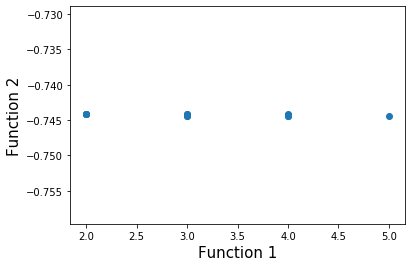

In [13]:
import math
import random
import matplotlib.pyplot as plt

#First function to optimize
def function1(x):
    value = -sum(x)
    return value

#Second function to optimize
def function2(x):
    indexes = [i for i, v in enumerate(x) if v == 1]
    if indexes == []: indexes = [0]
    value = linearSVM(indexes, False)
    return value

#Function to find index of list
def index_of(a,list):
    for i in range(0,len(list)):
        if list[i] == a:
            return i
    return -1

#Function to sort by values
def sort_by_values(list1, values):
    sorted_list = []
    while(len(sorted_list)!=len(list1)):
        if index_of(min(values),values) in list1:
            sorted_list.append(index_of(min(values),values))
        values[index_of(min(values),values)] = math.inf
    return sorted_list

#Function to carry out NSGA-II's fast non dominated sort
def fast_non_dominated_sort(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front

#Function to calculate crowding distance
def crowding_distance(values1, values2, front):
    distance = [0 for i in range(0,len(front))]
    sorted1 = sort_by_values(front, values1[:])
    sorted2 = sort_by_values(front, values2[:])
    distance[0] = 4444444444444444
    distance[len(front) - 1] = 4444444444444444
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted1[k+1]] - values2[sorted1[k-1]])/(max(values1)-min(values1))
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted2[k+1]] - values2[sorted2[k-1]])/(max(values2)-min(values2))
    return distance

#Function to carry out the crossover
def crossover(solution1, solution2):
    number_of_genes = 10
    r = random.randint(0, number_of_genes - 1)
    tmp = solution1[:r].copy()
    solution1[:r], solution2[:r]  = solution2[:r], tmp
    return solution1

#Function to carry out the mutation operator
def mutation(solution1):
    number_of_genes = 10
    r = random.randint(0, number_of_genes - 1)
    solution1[r] = 1 - solution1[r]
    return solution1

#Main program starts here
pop_size = 20
max_gen = 20
number_of_genes = 10

#Initialization
solution = [list(np.random.randint(2, size = number_of_genes)) for i in range(0,pop_size)]
[mutation(s) for s in solution if sum(s) == 0]
gen_no = 0
while(gen_no<max_gen):
    function1_values = [function1(solution[i]) for i in range(0,pop_size)]
    function2_values = [function2(solution[i]) for i in range(0,pop_size)]
    non_dominated_sorted_solution = fast_non_dominated_sort(function1_values[:],function2_values[:])
    print("The best front for Generation number ",gen_no, " is")
    for valuez in non_dominated_sorted_solution[0]:
        print(solution[valuez], function2(solution[valuez]), end=" ")
    print("\n")
    crowding_distance_values=[]
    for i in range(0,len(non_dominated_sorted_solution)):
        crowding_distance_values.append(crowding_distance(function1_values[:],function2_values[:],non_dominated_sorted_solution[i][:]))
    solution2 = solution[:]
    #Generating offsprings
    while(len(solution2)!=2*pop_size):
        a1 = random.randint(0,pop_size-1)
        b1 = random.randint(0,pop_size-1)
        c1 = crossover(solution[a1],solution[b1])
        #d1 = mutation(c1)
        solution2.append(c1)
    [mutation(s) for s in solution2 if sum(s) == 0]
    function1_values2 = [function1(solution2[i]) for i in range(0,2*pop_size)]
    function2_values2 = [function2(solution2[i]) for i in range(0,2*pop_size)]
    non_dominated_sorted_solution2 = fast_non_dominated_sort(function1_values2[:],function2_values2[:])
    crowding_distance_values2=[]
    for i in range(0,len(non_dominated_sorted_solution2)):
        crowding_distance_values2.append(crowding_distance(function1_values2[:],function2_values2[:],non_dominated_sorted_solution2[i][:]))
    new_solution= []
    for i in range(0,len(non_dominated_sorted_solution2)):
        non_dominated_sorted_solution2_1 = [index_of(non_dominated_sorted_solution2[i][j],non_dominated_sorted_solution2[i]) for j in range(0,len(non_dominated_sorted_solution2[i]))]
        front22 = sort_by_values(non_dominated_sorted_solution2_1[:], crowding_distance_values2[i][:])
        front = [non_dominated_sorted_solution2[i][front22[j]] for j in range(0,len(non_dominated_sorted_solution2[i]))]
        front.reverse()
        for value in front:
            new_solution.append(value)
            if(len(new_solution)==pop_size):
                break
        if (len(new_solution) == pop_size):
            break
    solution = [solution2[i] for i in new_solution]
    gen_no = gen_no + 1

#Lets plot the final front now
function1 = [i * -1 for i in function1_values]
function2 = [j * -1 for j in function2_values]
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(function1, function2)
plt.show()

In [14]:
def mutation(solution1):
    number_of_genes = 10
    r = random.randint(0, number_of_genes - 1)
    solution1[r] = 1 - solution1[r]
    return solution1

solution = [list(np.random.randint(2, size = 10)) for i in range(0,10)]
print(solution)
print()
[mutation(s) for s in solution if sum(s) == 5]
print(solution)

[[0, 1, 0, 0, 1, 0, 0, 1, 0, 1], [0, 0, 1, 1, 0, 0, 1, 0, 0, 1], [1, 1, 0, 0, 1, 0, 1, 1, 1, 0], [0, 0, 1, 1, 0, 0, 0, 1, 0, 1], [1, 1, 1, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 0, 0, 1, 1, 1, 1, 1], [1, 1, 0, 0, 0, 1, 1, 1, 1, 1], [1, 0, 0, 1, 1, 0, 1, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [1, 0, 0, 0, 0, 0, 1, 1, 1, 1]]

[[0, 1, 0, 0, 1, 0, 0, 1, 0, 1], [0, 0, 1, 1, 0, 0, 1, 0, 0, 1], [1, 1, 0, 0, 1, 0, 1, 1, 1, 0], [0, 0, 1, 1, 0, 0, 0, 1, 0, 1], [1, 1, 1, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 0, 0, 1, 1, 1, 1, 1], [1, 1, 0, 0, 0, 1, 1, 1, 1, 1], [1, 0, 0, 1, 1, 0, 1, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 0, 0, 1, 1, 1, 1]]


# Comments

Author:
    GOSHGAR ISMAYILOV
    SERHAT İŞCAN